In [ ]:
!pip install category_encoders 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 9.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, StandardScaler
warnings.filterwarnings('ignore')

In [ ]:
!ls

sample_data


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ls

drive  sample_data


In [ ]:
loan_data = data = pd.read_excel('/content/drive/MyDrive/AML_FinalProject_Group18/Bank_Personal_Loan_Modelling.xlsx','Data')

# Exploratory Data Analysis

In [ ]:
loan_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
loan_data.shape

(5000, 14)

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## Data Analysis

In [ ]:
edu_exp = loan_data.groupby("Education").Experience.mean().sort_values(ascending=True)
edu_exp

Education
2    19.770492
1    20.065363
3    20.471686
Name: Experience, dtype: float64

In [ ]:
age_exp = loan_data.groupby('Age')['Experience'].mean().sort_values(ascending=False).reset_index()
age_exp

,Age,Experience
0,67,41.833333
1,66,40.875000
2,65,39.812500
3,64,38.846154
4,63,37.638889
5,62,36.829268
6,61,35.672131
7,60,34.645669
8,59,34.000000
9,58,32.559441


Text(0.5, 1.0, 'Average of Experience by Age')

<Figure size 1000x700 with 0 Axes>

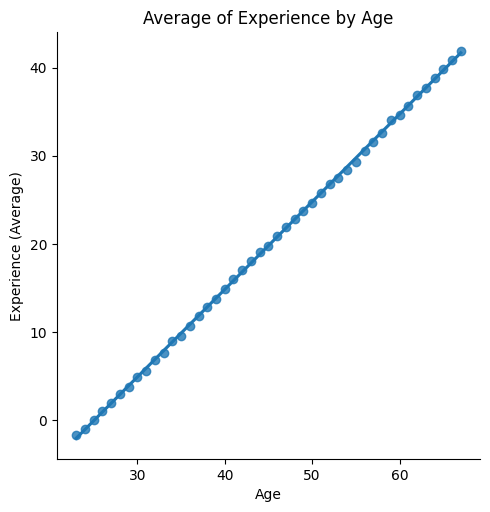

In [ ]:
plt.figure(figsize=(10,7))
sns.lmplot(x="Age", y="Experience", data=age_exp)
plt.ylabel("Experience (Average)")
plt.title("Average of Experience by Age")

<p>Notice there are inconsistent data in our dataset. The number of years of experience couldn't be a negative number. After exploring the dataset, we found there are only few entries containing negative years of experience. Removing few entries will not influence our later model and prediction. So we'll remove these entries in data preprocessing part. </p>

In [ ]:
summ = loan_data.describe()
pd.DataFrame(summ, columns=summ.columns).transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


## Feature Correlation Analysis

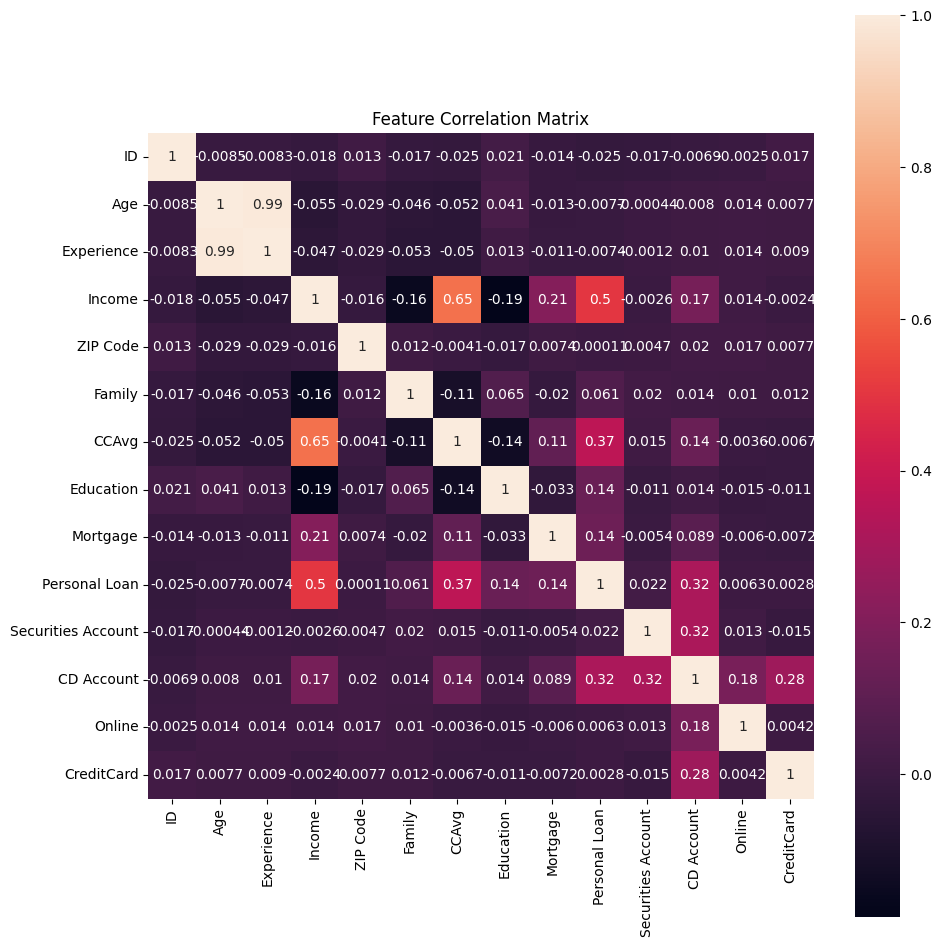

In [ ]:
corr = loan_data.corr()
plt.subplots(figsize=(10,10));
sns.heatmap(corr, annot=True, square=True)
plt.title("Feature Correlation Matrix")
plt.tight_layout()

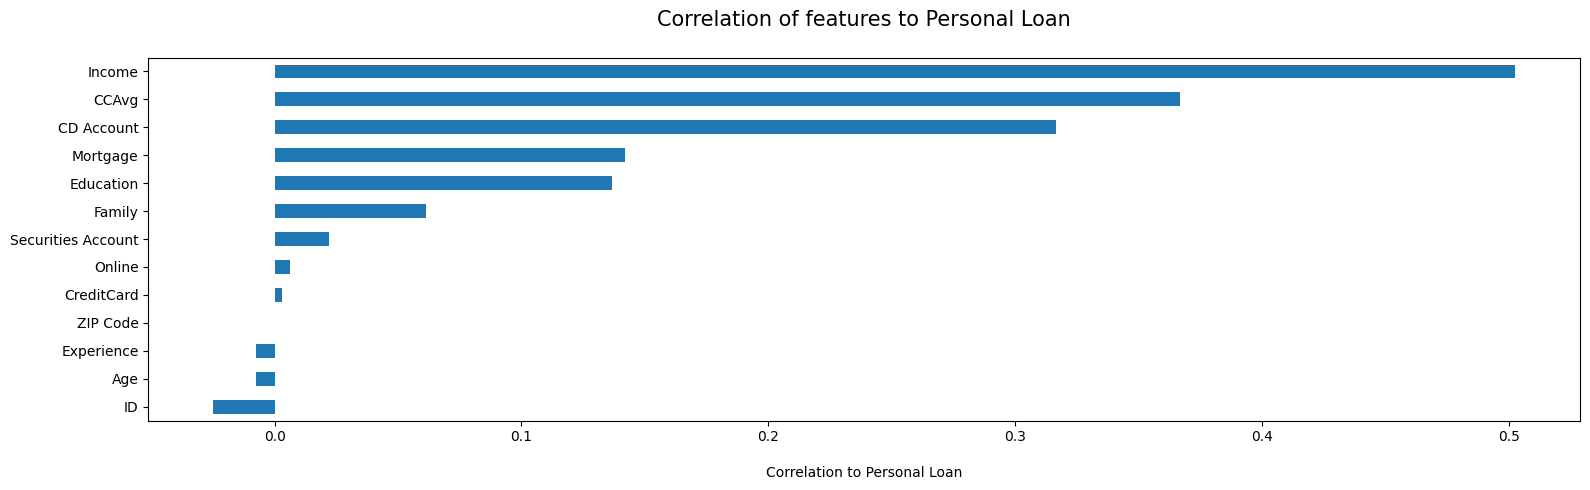

In [ ]:
plt.figure(figsize=(16,5))
corr["Personal Loan"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of features to Personal Loan\n", fontsize=15)
plt.xlabel("\nCorrelation to Personal Loan")
plt.tight_layout()
plt.show()

Analysis:

According to the correlation heatmap and the bar graph we plot above, we have the following initial observations:

1. The top 3 most important features to Personal_Loan is "Income", "CCAvg", and "CD Account"
2. "ZIP Code" have no correlation with our target variable "Personal_Loan".
3. From the Data Analysis part and the correlation heatmap, we can find "Age" and "Experience" are highly correlated and almost linearly related to each other, with correlation 0.99 with each other. Thus, we processing our data for model training, we can consider this pair of features as "Multicollinearity" and drop either one of them to avoid some negative influence on our model.

## Univariate Analysis

### Numerical Feature Distribution

#### Mortgage

Text(0.5, 1.0, 'Mortgage Distribution with KDE')

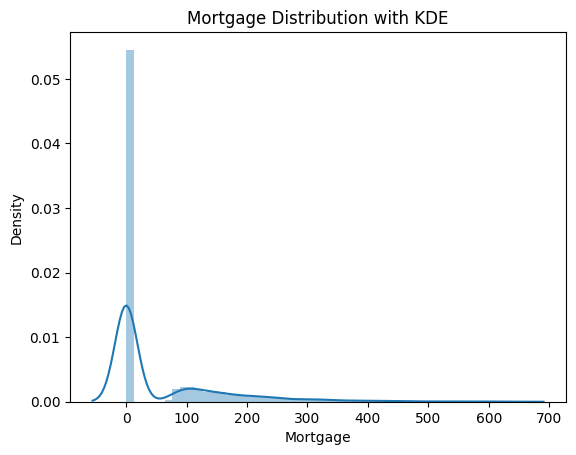

In [ ]:
sns.distplot(loan_data["Mortgage"])
plt.title("Mortgage Distribution with KDE")

According to the plot above, we can find this plot of "Mortgage" is skewed to the right, meaning most people have no or only little mortgage. From this observation, we know we need to transform/standardize/normalize this feature for later data processing to avoid bias/distortation in our prediction results.

#### Experience

Text(0.5, 1.0, 'Distribution of Experience')

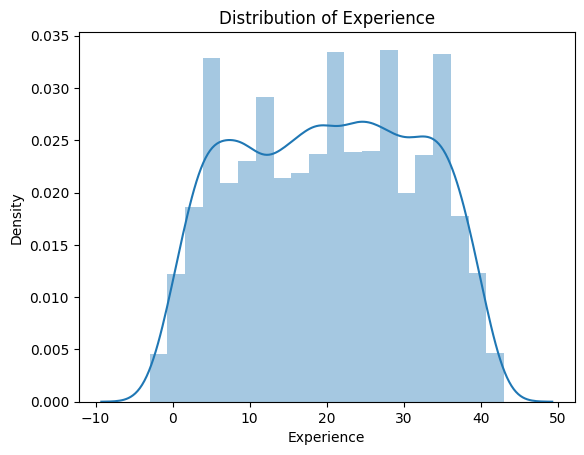

In [ ]:
sns.distplot(loan_data['Experience'])
plt.title("Distribution of Experience")

#### Income

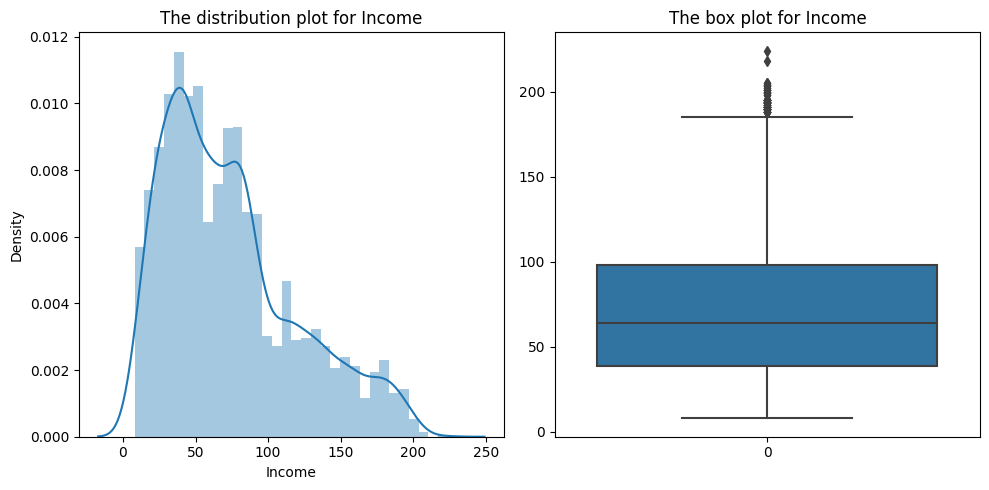

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(loan_data['Income'], ax=axes[0])
axes[0].title.set_text("The distribution plot for Income")
sns.boxplot(loan_data['Income'], orient="v", ax=axes[1])
axes[1].title.set_text("The box plot for Income")
plt.tight_layout()

Notice that the "Income" feature is also a little bit right skewed. From its box plot, we can find there are some outliers. So we also need to normalize this feature when feeding data into our model.

#### CCAvg

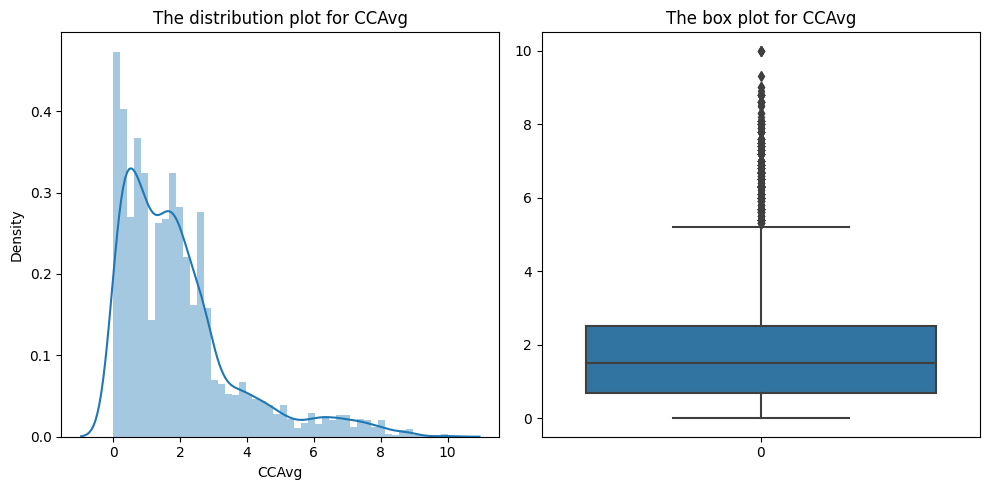

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(loan_data['CCAvg'], ax=axes[0])
sns.boxplot(loan_data['CCAvg'], orient="v", ax=axes[1])
axes[0].title.set_text("The distribution plot for CCAvg")
axes[1].title.set_text("The box plot for CCAvg")
plt.tight_layout()

According to the distribution and the box plot above, we can also find "CCAvg" is also right skewed. Moreover, outliers exist in the box plot. So we need to do normalization to avoid data imbalance issues.

### Categorical Feature Analysis

#### Education

Text(0.5, 1.0, 'Distribution of Education')

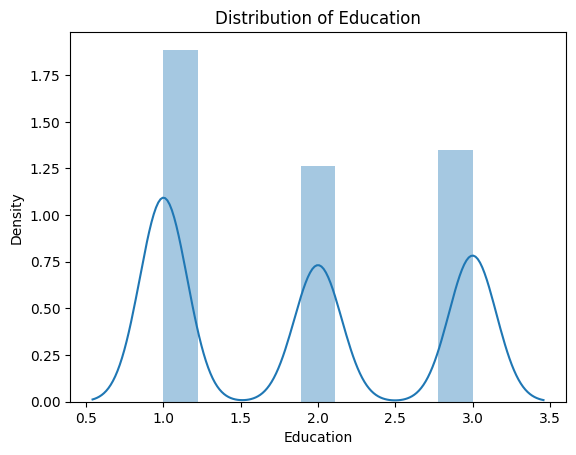

In [ ]:
sns.distplot(loan_data['Education'])
plt.title("Distribution of Education")

#### Personal Loan

<Axes: >

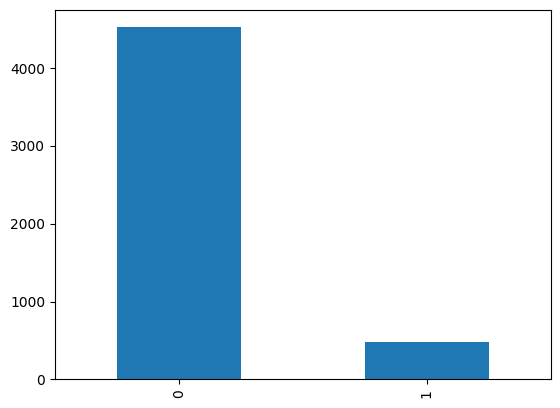

In [ ]:
loan_data["Personal Loan"].value_counts().plot(kind='bar')

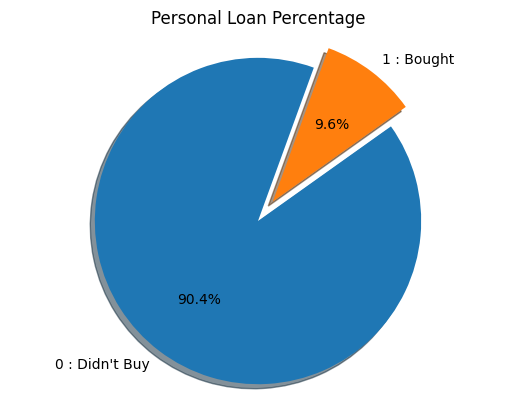

In [ ]:
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(loan_data["Personal Loan"].value_counts(), explode=explode, labels=["0 : Didn't Buy", "1 : Bought"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')
plt.title("Personal Loan Percentage")
plt.show()

According to the pie chart above, we can find out of all customers, only 9.6% customers bought loan in the last campaign. So data imbalance issues exist in our dataset. We need to deal with this imbalance issue in the later part.

#### Family

Text(0.5, 1.0, 'Distribution of Family')

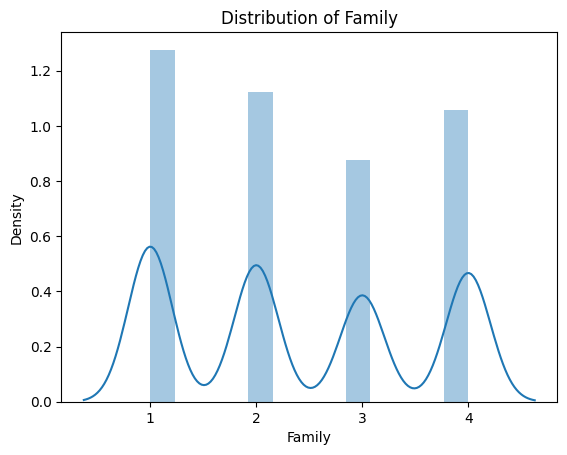

In [ ]:
sns.distplot(loan_data['Family'])
plt.title("Distribution of Family")

## Bivariate Analysis

### Income VS. Peronal Loan

Text(0.5, 1.0, 'Income Distribution')

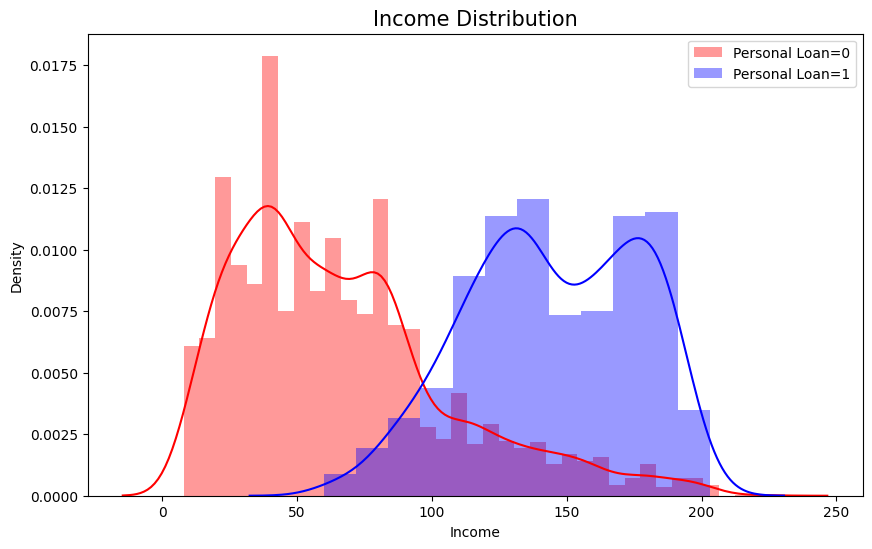

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(loan_data[loan_data["Personal Loan"] == 0]['Income'], color = 'r',label='Personal Loan=0',kde=True)
sns.distplot(loan_data[loan_data["Personal Loan"] == 1]['Income'], color = 'b',label='Personal Loan=1',kde=True)
plt.legend()
plt.title("Income Distribution", fontsize=15)

According to the distrubition graph between income and personal loan, we can find people who has personal load usually have higher income. For people whose income is lower, they are less likely to have personal loan.

### CCAvg VS. Personal Loan

Text(0.5, 1.0, 'CCAvg Distribution')

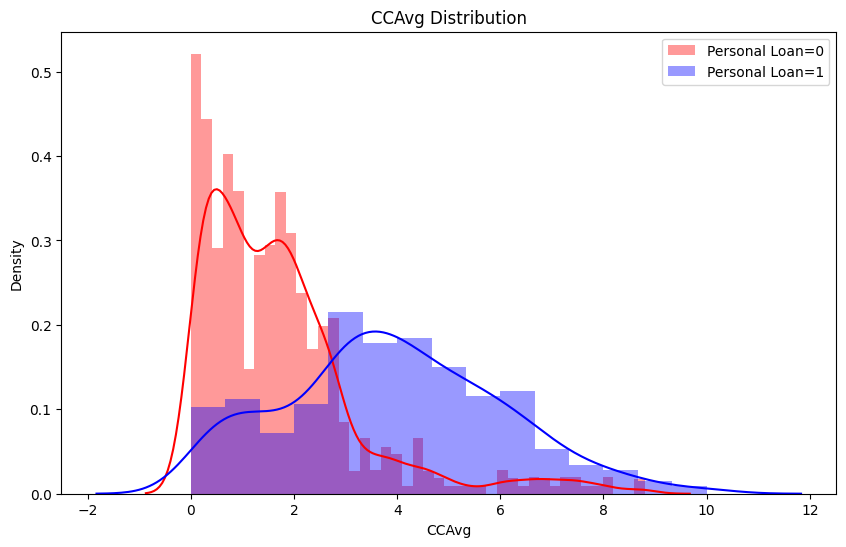

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(loan_data[loan_data["Personal Loan"] == 0]['CCAvg'], color = 'r',label='Personal Loan=0',kde=True)
sns.distplot(loan_data[loan_data["Personal Loan"] == 1]['CCAvg'], color = 'b',label='Personal Loan=1',kde=True)
plt.legend()
plt.title("CCAvg Distribution")

According to the distrubition graph between CCAvg and personal loan, we can find people who has personal load usually have higher monthly spending with the credit card. For people whose income is lower, they spend less with the credit card each month.

### Age & Experience VS. Personal Loan

Text(0.5, 1.0, 'Age Distribution')

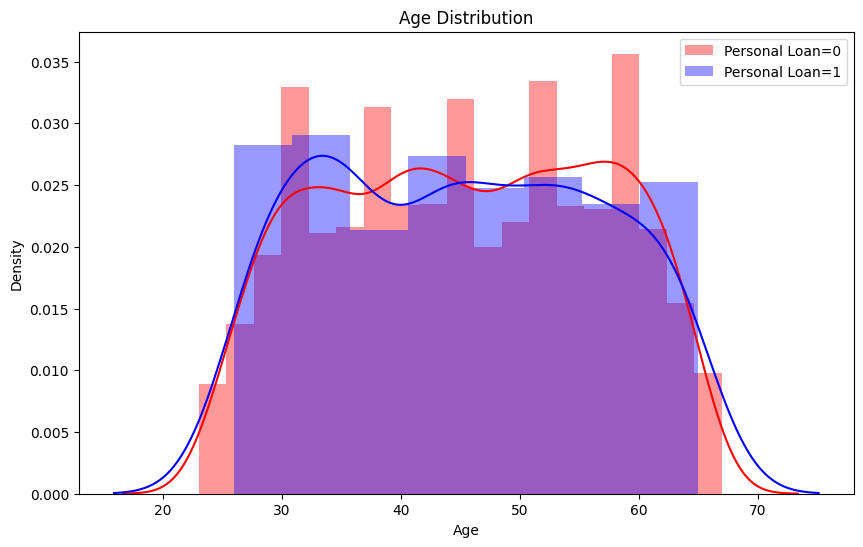

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(loan_data[loan_data["Personal Loan"] == 0]['Age'], color = 'r',label='Personal Loan=0',kde=True)
sns.distplot(loan_data[loan_data["Personal Loan"] == 1]['Age'], color = 'b',label='Personal Loan=1',kde=True)
plt.legend()
plt.title("Age Distribution")

Text(0.5, 1.0, 'Experience Distribution')

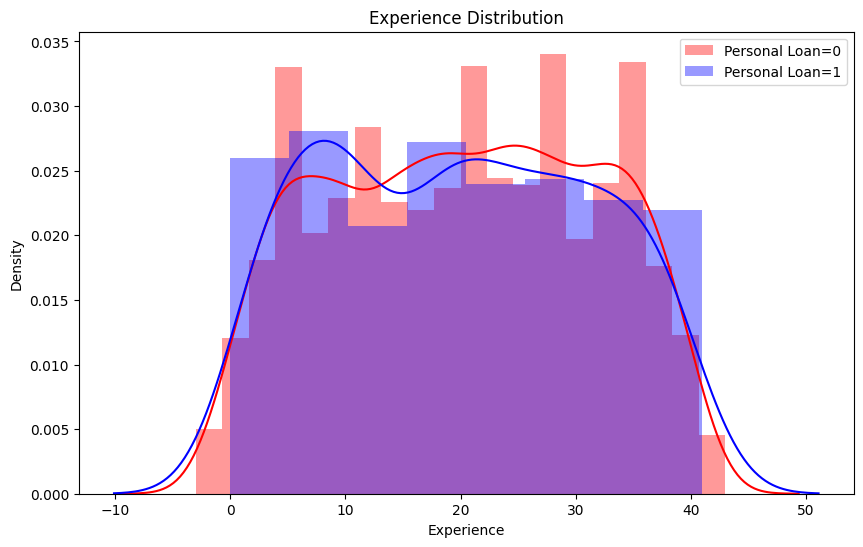

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(loan_data[loan_data["Personal Loan"] == 0]['Experience'], color = 'r',label='Personal Loan=0',kde=True)
sns.distplot(loan_data[loan_data["Personal Loan"] == 1]['Experience'], color = 'b',label='Personal Loan=1',kde=True)
plt.legend()
plt.title("Experience Distribution")

Based on our previous conclusion, we know age and year of experience are closed positively related to each other. So their distribution graphs show roughly the same pattern. Moreover, the distribution are kind of average for these two features vs. personal loan. Thus, these two features might not influence our target variable too much.

### Securities Account VS. Personal Loan

Text(0, 0.5, 'Count')

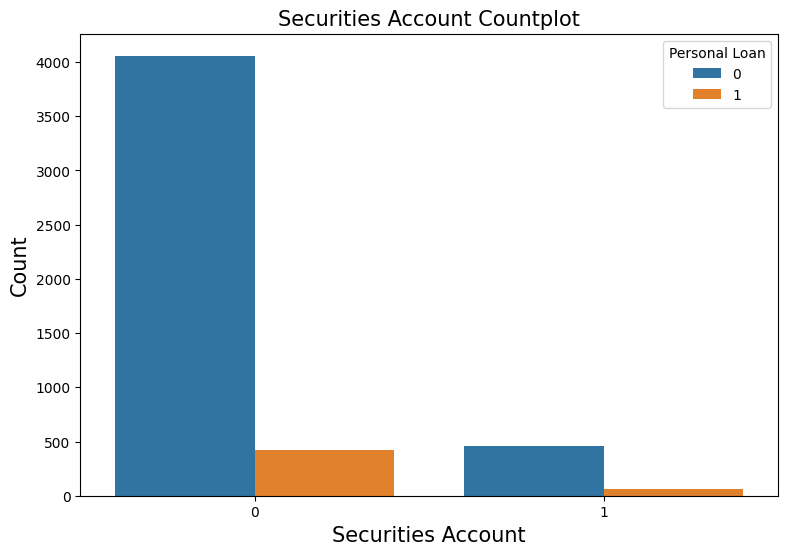

In [ ]:
plt.figure(figsize=(9,6))
sns.countplot(x="Securities Account", hue="Personal Loan", data=loan_data)
plt.xticks(horizontalalignment='center')
plt.yticks(horizontalalignment='right')
plt.title('Securities Account Countplot', fontsize=15)
plt.xlabel('Securities Account', fontsize=15)
plt.ylabel('Count', fontsize=15)

From the count plot above, we can find most people do not have securities account. Moreover, out of which, most people do not have personal loans either.

### Family Countplot VS. Personal Loan

Text(0, 0.5, 'Count')

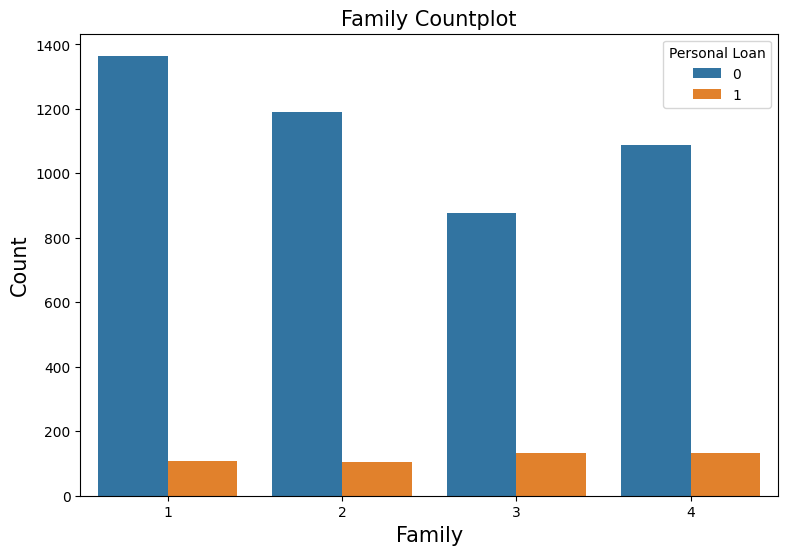

In [ ]:
plt.figure(figsize=(9,6))
sns.countplot(x="Family", hue="Personal Loan", data=loan_data)
plt.xticks(horizontalalignment='center')
plt.yticks(horizontalalignment='right')
plt.title('Family Countplot', fontsize=15)
plt.xlabel('Family', fontsize=15)
plt.ylabel('Count', fontsize=15)

From the countplot above, we can find from the person who do not have personal loan, their family size tend to be 1, followed by 2. This is a reasonable observation sincc their expense is less than other categories of customers. Then for people who have personal loan, they usually have a larger family size. 

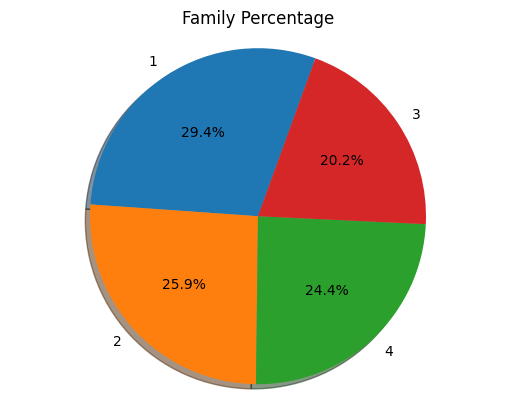

In [ ]:
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
# count the number of occurrences of each education level
counts = loan_data['Family'].value_counts()
ax1.pie(counts, labels=counts.index, autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')
plt.title("Family Percentage")
plt.show()

### Education VS. Personal Loan

Text(0, 0.5, 'Count')

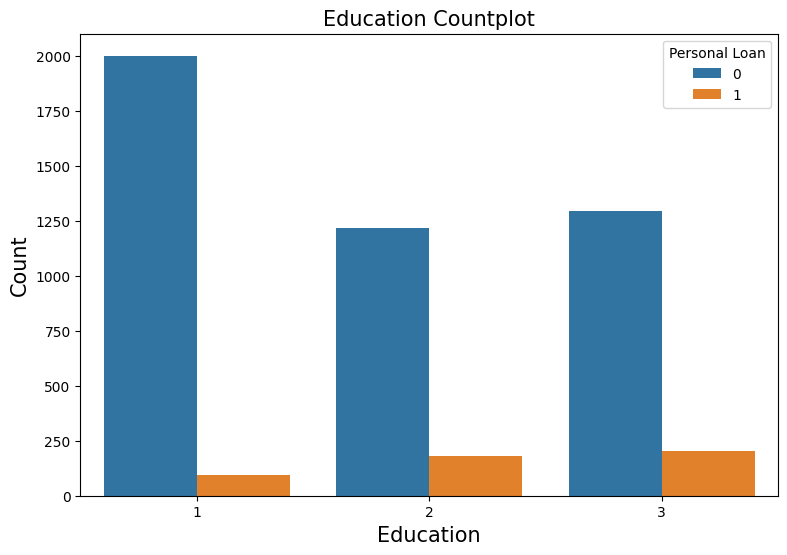

In [ ]:
plt.figure(figsize=(9,6))
sns.countplot(x="Education", hue="Personal Loan", data=loan_data)
plt.xticks(horizontalalignment='center')
plt.yticks(horizontalalignment='right')
plt.title('Education Countplot', fontsize=15)
plt.xlabel('Education', fontsize=15)
plt.ylabel('Count', fontsize=15)

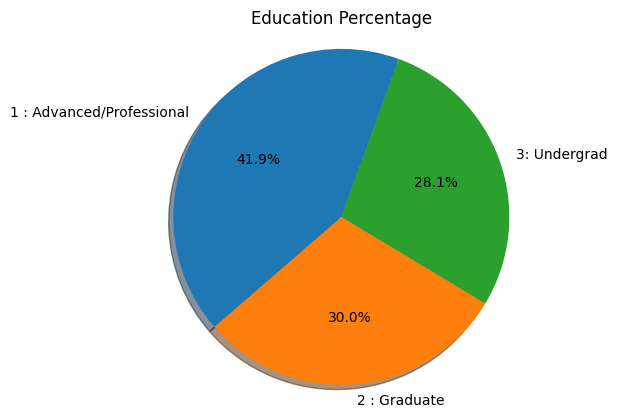

In [ ]:
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
# count the number of occurrences of each education level
counts = loan_data['Education'].value_counts()
ax1.pie(counts, labels=["1 : Advanced/Professional", "2 : Graduate", "3: Undergrad"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')
plt.title("Education Percentage")
plt.show()

Customers with lower educational qualification are more likely to buy personal loan. As they should have a lower income. But customers who have high qualified education background are less prone to buy personal loan.

### Online VS. Personal Loan

Text(0, 0.5, 'Count')

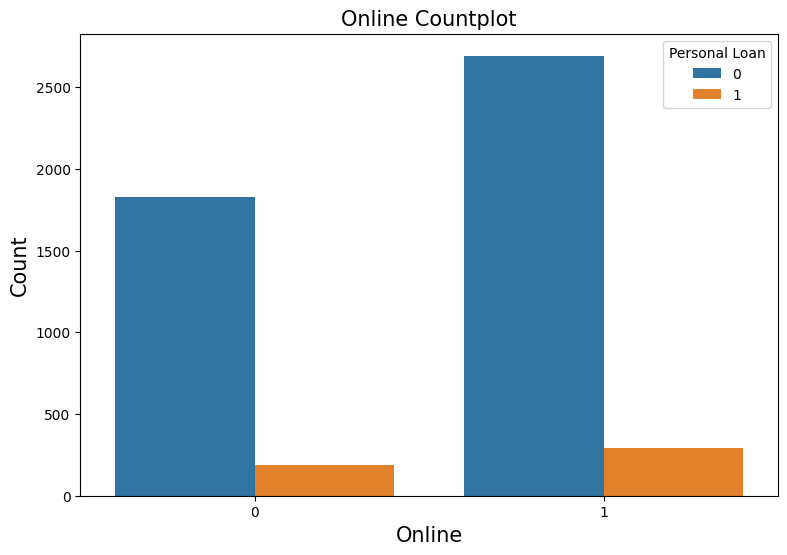

In [ ]:
plt.figure(figsize=(9,6))
sns.countplot(x="Online", hue="Personal Loan", data=loan_data)
plt.xticks(horizontalalignment='center')
plt.yticks(horizontalalignment='right')
plt.title('Online Countplot', fontsize=15)
plt.xlabel('Online', fontsize=15)
plt.ylabel('Count', fontsize=15)

Most customers has online internet banking facility and the people who have these facility have bought more number of personal loans.

### Credit Card VS. Personal Loan

Text(0, 0.5, 'Count')

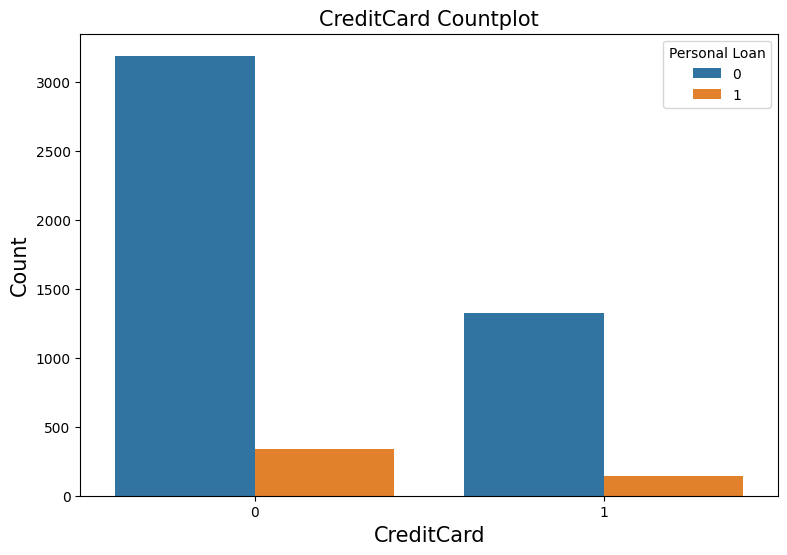

In [ ]:
plt.figure(figsize=(9,6))
sns.countplot(x="CreditCard", hue="Personal Loan", data=loan_data)
plt.xticks(horizontalalignment='center')
plt.yticks(horizontalalignment='right')
plt.title('CreditCard Countplot', fontsize=15)
plt.xlabel('CreditCard', fontsize=15)
plt.ylabel('Count', fontsize=15)

Most customers don't have a credit card. And the maximum number of customers who bought personal loan falls in this category, as they don't have the privilage to buy anything on credit using credit card. So they are more likely to buy things with personal loan.

### CD Account VS. Personal Loan

Text(0, 0.5, 'Count')

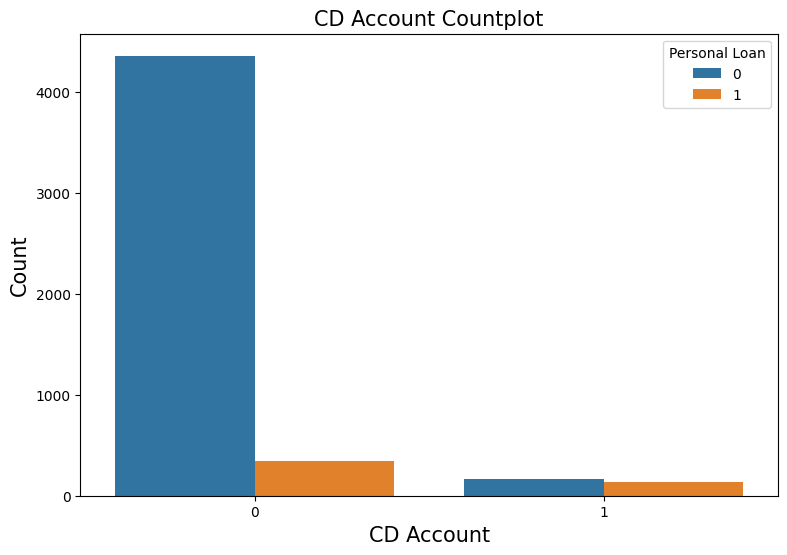

In [ ]:
plt.figure(figsize=(9,6))
sns.countplot(x="CD Account", hue="Personal Loan", data=loan_data)
plt.xticks(horizontalalignment='center')
plt.yticks(horizontalalignment='right')
plt.title('CD Account Countplot', fontsize=15)
plt.xlabel('CD Account', fontsize=15)
plt.ylabel('Count', fontsize=15)

### Income VS. Mortgage

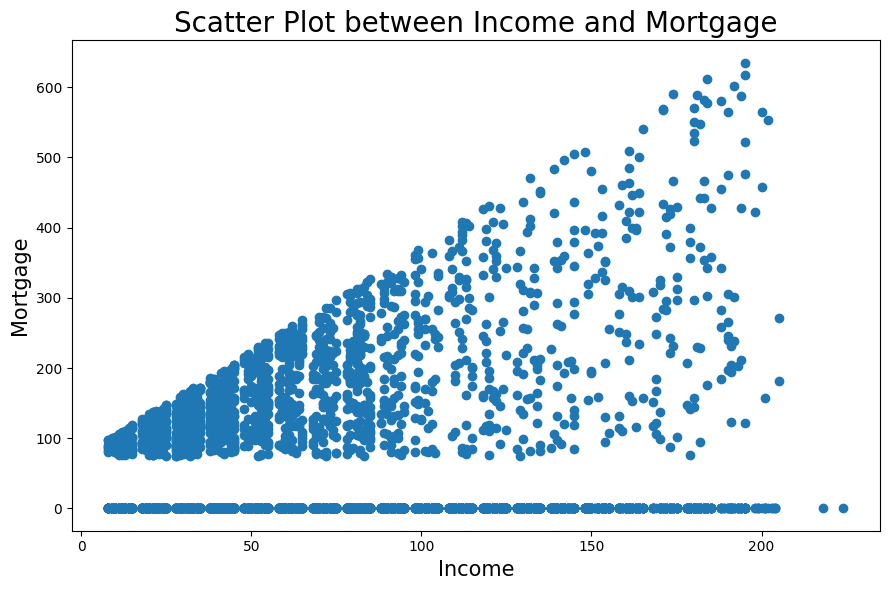

In [ ]:
plt.figure(figsize=(9,6))
plt.scatter(x=loan_data["Income"], y=loan_data["Mortgage"])
plt.title("Scatter Plot between Income and Mortgage", fontsize=20)
plt.xlabel("Income", fontsize=15)
plt.ylabel("Mortgage", fontsize=15)
plt.xticks(horizontalalignment='center')
plt.yticks(horizontalalignment='right')
plt.tight_layout()

Many of the customers don't have any mortgage in their name. So we can observe a line along the mortgage value zero. And the mortgage value for the customers increases with increase in their income.

### Income VS. CCAvg

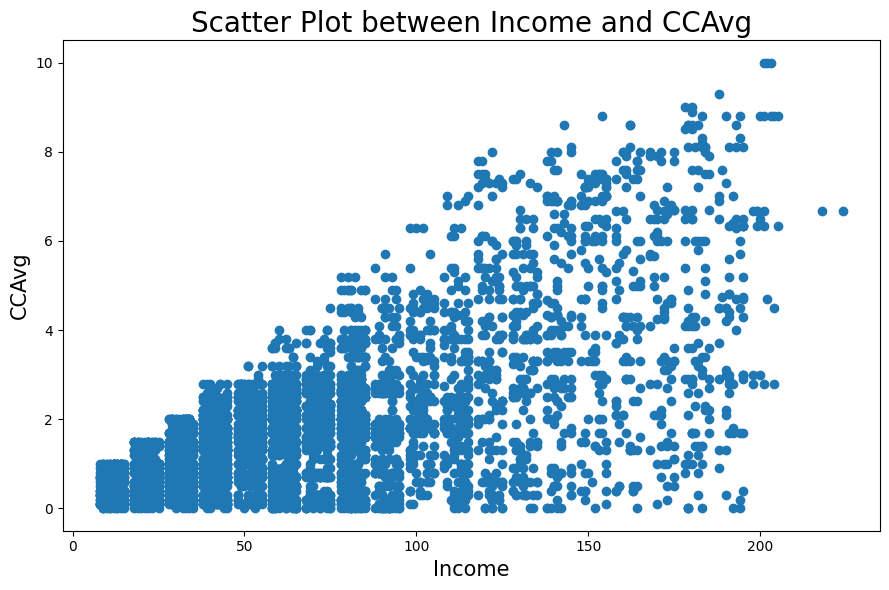

In [ ]:
plt.figure(figsize=(9,6))
plt.scatter(x=loan_data["Income"], y=loan_data["CCAvg"])
plt.title("Scatter Plot between Income and CCAvg", fontsize=20)
plt.xlabel("Income", fontsize=15)
plt.ylabel("CCAvg", fontsize=15)
plt.xticks(horizontalalignment='center')
plt.yticks(horizontalalignment='right')
plt.tight_layout()

# Data Preprocessing

## Data Cleaning

1. After the initial data exploration, we found that the dataset doesn’t contain any missing or duplicate values.

2. Based on the Univariate Analysis, we need to drop all the noise records whose ‘Experience’ <0 or ‘ZIP Code’ < 5 digits.

3. Drop The variable ID, since it only acts as a customer identifier without adding any useful information to the dataset.

4. Drop ‘Age’ (strongly correlated with Experience.)


In [ ]:
# No missing Values
loan_data.isnull().sum().sum()

0

In [ ]:
# No duplicated Values
loan_data[loan_data.duplicated(keep=False)].sum().sum()

0.0

In [ ]:
loan_data[loan_data['Experience']<0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [ ]:
loan_data[loan_data['ZIP Code']<10000]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
384,385,51,25,21,9307,4,0.6,3,0,0,0,0,1,1


In [ ]:
# Drop ‘Experience’ <0 or ‘ZIP Code’ < 5 digits.
loan_data = loan_data[loan_data['Experience'] >=0]

loan_data = loan_data[loan_data['ZIP Code'] >= 10000]

In [ ]:
# Drop The variable ID, since it only acts as a customer identifier without adding any useful information to the dataset.
loan_data.drop(columns = {'ID'}, inplace = True)

In [ ]:
# Drop ‘Age’ (strongly correlated with Experience.)
loan_data.drop(columns = {'Age'}, inplace = True)

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4947 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Experience          4947 non-null   int64  
 1   Income              4947 non-null   int64  
 2   ZIP Code            4947 non-null   int64  
 3   Family              4947 non-null   int64  
 4   CCAvg               4947 non-null   float64
 5   Education           4947 non-null   int64  
 6   Mortgage            4947 non-null   int64  
 7   Personal Loan       4947 non-null   int64  
 8   Securities Account  4947 non-null   int64  
 9   CD Account          4947 non-null   int64  
 10  Online              4947 non-null   int64  
 11  CreditCard          4947 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 502.4 KB


## Feature Enginneering

1. Log transformation will be applied to remove the right skewness in ‘Income’, ‘‘CCAvg’, and ‘Mortgage’(too many zeros and plus one before log transformation).

2. Convert ‘CCAvg’ average monthly credit card spending to annual spending by times 12 (Equal the unit in the Income)

3. Category Encoding will be selected to convert ‘Family’, ‘Education’ and ‘Zip Code’ into numerical values.


In [ ]:
# Log transformation removes the right skewness in ‘Income’, ‘‘CCAvg’, and ‘Mortgage’
# (too many zeros and plus one before log transformation)

for i in ['Income', 'CCAvg', 'Mortgage']:
    loan_data[i] = (loan_data[i] + 1).apply(np.log10)

In [ ]:
# Convert ‘CCAvg’ average monthly credit card spending to annual spending by times 12 
loan_data['CCAvg'] = loan_data['CCAvg']*12

In [ ]:
loan_data

,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,1.698970,91107,4,4.979680,1,0.000000,0,1,0,0,0
1,19,1.544068,90089,3,4.775280,1,0.000000,0,1,0,0,0
2,15,1.079181,94720,1,3.612360,1,0.000000,0,0,0,0,0
3,9,2.004321,94112,1,6.818421,2,0.000000,0,0,0,0,0
4,8,1.662758,91330,4,3.612360,2,0.000000,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3,1.612784,92697,1,5.548776,3,0.000000,0,0,0,1,0
4996,4,1.204120,92037,4,1.753536,1,1.934498,0,0,0,1,0
4997,39,1.397940,93023,2,1.367320,3,0.000000,0,0,0,0,0
4998,40,1.698970,90034,3,2.113095,2,0.000000,0,0,0,1,0


In [ ]:
# Category Encoding on ‘Family’, ‘Education’ and ‘Zip Code’ into numerical values
import category_encoders as ce
from category_encoders import TargetEncoder

loan_data_X = loan_data.drop(columns = ['Personal Loan'])
loan_data_y = loan_data['Personal Loan']

te_features = ['Family', 'Education', 'ZIP Code']
te_df = ce.TargetEncoder(cols = te_features).fit_transform(loan_data_X, loan_data_y)

In [ ]:
te_df = pd.concat((te_df, loan_data_y) , axis = 1)
te_df.head(5)

,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,1.698970,0.113775,0.111481,4.979680,0.044712,0.0,1,0,0,0,0
1,19,1.544068,0.174766,0.132867,4.775280,0.044712,0.0,1,0,0,0,0
2,15,1.079181,0.115854,0.072789,3.612360,0.044712,0.0,0,0,0,0,0
3,9,2.004321,0.068982,0.072789,6.818421,0.131218,0.0,0,0,0,0,0
4,8,1.662758,0.067417,0.111481,3.612360,0.131218,0.0,0,0,0,1,0


In [ ]:
te_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4947 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Experience          4947 non-null   int64  
 1   Income              4947 non-null   float64
 2   ZIP Code            4947 non-null   float64
 3   Family              4947 non-null   float64
 4   CCAvg               4947 non-null   float64
 5   Education           4947 non-null   float64
 6   Mortgage            4947 non-null   float64
 7   Securities Account  4947 non-null   int64  
 8   CD Account          4947 non-null   int64  
 9   Online              4947 non-null   int64  
 10  CreditCard          4947 non-null   int64  
 11  Personal Loan       4947 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 502.4 KB


## Address Imbalanced Data

1. Target Variable: Personal Loan (Whether the potential customers have a higher probability of purchasing the loan)

2. Only 9.6% customers bought loan in the last campaign

3. Synthetic Minority Oversampling Technique & Train-Test Split (80:20)- Reduce Overfitting incurred by Oversampling

4. After All the above steps:
    1. The shape of my development set is (3957, 11) 
    2. The shape of my test set is (990, 11)
    3. The shape of my development set after SMOTE is (5588, 11)
    4. The shape of my development target after SMOTE is (5588,)
    5. The number of positive labels in the development set are 2794
    6. The number of negative labels in the development set are 2794



In [ ]:
from sklearn.model_selection import train_test_split
X = te_df.drop(columns = 'Personal Loan')
y = te_df['Personal Loan']

X_dev, X_test, y_dev, y_test = train_test_split(X,y, test_size=0.2,
                                                stratify = y, random_state=42)
print('The shape of my development set is {}'.format(X_dev.shape) )
print('The shape of my test set is {}'.format(X_test.shape) )
print("*****************************************************************")
print('The shape of my development target is {}'.format(y_dev.shape) )
print('The shape of my test target is {}'.format(y_test.shape) )

The shape of my development set is (3957, 11)
The shape of my test set is (990, 11)
*****************************************************************
The shape of my development target is (3957,)
The shape of my test target is (990,)


In [ ]:
te_df['Personal Loan'].value_counts(normalize = True)

0    0.902971
1    0.097029
Name: Personal Loan, dtype: float64

In [ ]:
y_dev.value_counts(normalize = True)

0    0.902957
1    0.097043
Name: Personal Loan, dtype: float64

In [ ]:
y_test.value_counts(normalize = True)

0    0.90303
1    0.09697
Name: Personal Loan, dtype: float64

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_dev_subsample_smote, y_dev_subsample_smote = smote.fit_resample(X_dev,y_dev)
print('The shape of my development set after SMOTE is {}'.format(X_dev_subsample_smote.shape))
print('The shape of my development target after SMOTE is {}'.format(y_dev_subsample_smote.shape))
print("The number of positive labels in the development set are {}".format(y_dev_subsample_smote.value_counts()[1]))
print("The number of negative labels in the development set are {}".format(y_dev_subsample_smote.value_counts()[0]))

The shape of my development set after SMOTE is (7146, 11)
The shape of my development target after SMOTE is (7146,)
The number of positive labels in the development set are 3573
The number of negative labels in the development set are 3573


# ML Techniques

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.svm import SVC

To train machine learning models for classifying personal loans, we will define several functions that help select best hyperparameters for each model.

In [ ]:
def f1_metric(model, X_train, y_train):
    return f1_score(y_train, model.predict(X_train), average='binary')

def tune_hyperparameters(MLclf, hyper_params, X_train, y_train):
    cross_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    MLclf_search = GridSearchCV(MLclf, hyper_params, cv=cross_validation, scoring=f1_metric, n_jobs=-1)
    MLclf_search.fit(X_train, y_train)
    print("Best hyperparameters based on the 5-fold corss-validation:\n", MLclf_search.best_params_)    
    return MLclf_search.best_estimator_ 

## Logistic Regression Model

Logistic Regression ML classifier:

To train logistric regression classifier, we will follow the below steps:
1.   Train and test the classifier using the dataset after SMOTE method
2.   Visulize the confusion metric and ROC plot of the trained classifer in test dataset


3.   Train and test the classifier using the dataset without using SMOTE method
4.   Visulize the confusion metric and ROC plot of the trained classifer in test dataset







### With SMOTE Technique
Training Dataset With SMOTE Technique

In [ ]:
hyper_params = [{'solver':['saga'], 'penalty':['l1','l2','elasticnet'], 'C': np.logspace(-1, 1, 10), 'l1_ratio': np.arange(0,0.4,0.1)},
                {'solver':['lbfgs','liblinear','newton','saga'], 'penalty': ['l1','l2'], 'C': np.logspace(-1, 1, 10), 'l1_ratio': np.arange(0,0.4,0.1)}]   
logistic = LogisticRegression(max_iter=666)
logistic_smote_opt = tune_hyperparameters(logistic, hyper_params, X_dev_subsample_smote, y_dev_subsample_smote)

Best hyperparameters based on the 5-fold corss-validation:
 {'C': 5.994842503189409, 'l1_ratio': 0.0, 'penalty': 'l1', 'solver': 'liblinear'}


Classification performance (logistic regression) for SMOTE-based training dataset
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3573
           1       0.92      0.94      0.93      3573

    accuracy                           0.93      7146
   macro avg       0.93      0.93      0.93      7146
weighted avg       0.93      0.93      0.93      7146


Classification performance (logistic regression) for test dataset
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       894
           1       0.55      0.92      0.69        96

    accuracy                           0.92       990
   macro avg       0.77      0.92      0.82       990
weighted avg       0.95      0.92      0.93       990



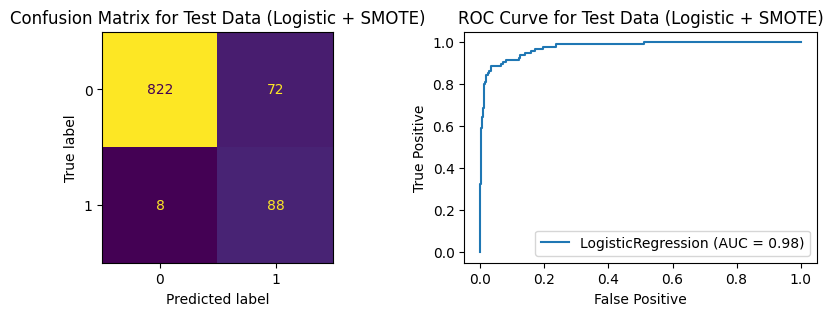

In [ ]:
y_pred_train_smote = logistic_smote_opt.predict(X_dev_subsample_smote)
print("Classification performance (logistic regression) for SMOTE-based training dataset")
print("-"*60)
print(classification_report(y_dev_subsample_smote, y_pred_train_smote))

y_pred_test_smote = logistic_smote_opt.predict(X_test)
print('')
print("Classification performance (logistic regression) for test dataset")
print("-"*60)
print(classification_report(y_test, y_pred_test_smote))

# Confusion Matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
ConfusionMatrixDisplay.from_estimator(logistic_smote_opt, X_test, y_test, colorbar=False, ax=ax1)
ax1.set_title('Confusion Matrix for Test Data (Logistic + SMOTE)')                                     

# ROC Curve 
RocCurveDisplay.from_estimator(logistic_smote_opt, X_test, y_test, ax=ax2)
ax2.set_title('ROC Curve for Test Data (Logistic + SMOTE)')
ax2.set_xlabel('False Positive')
ax2.set_ylabel('True Positive')
plt.show() 

### Without SMOTE Technique

In [ ]:
hyper_params = [{'solver':['saga'], 'penalty':['l1','l2','elasticnet'], 'C': np.logspace(-1, 1, 10), 'l1_ratio': np.arange(0,0.4,0.1)},
               {'solver':['lbfgs','liblinear','newton','saga'], 'penalty': ['l1','l2'], 'C': np.logspace(-1, 1, 10), 'l1_ratio': np.arange(0,0.4,0.1)}]   
logistic_ori = LogisticRegression(max_iter=666)
logistic_ori_opt = tune_hyperparameters(logistic_ori, hyper_params, X_dev, y_dev)

Best hyperparameters based on the 5-fold corss-validation:
 {'C': 10.0, 'l1_ratio': 0.0, 'penalty': 'l1', 'solver': 'liblinear'}


Classification performance (logistic regression) for training dataset without SMOTE technique
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3573
           1       0.91      0.76      0.82       384

    accuracy                           0.97      3957
   macro avg       0.94      0.87      0.90      3957
weighted avg       0.97      0.97      0.97      3957


Classification performance (logistic regression) for test dataset
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       894
           1       0.88      0.81      0.84        96

    accuracy                           0.97       990
   macro avg       0.93      0.90      0.91       990
weighted avg       0.97      0.97      0.97       990



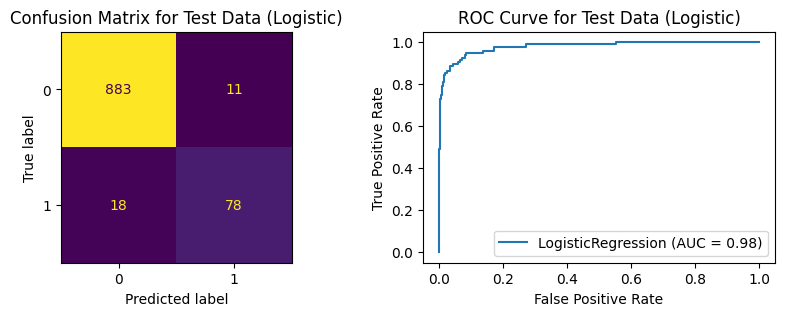

In [ ]:
y_pred_train_ori = logistic_ori_opt.predict(X_dev)
print("Classification performance (logistic regression) for training dataset without SMOTE technique")
print("-"*60)
print(classification_report(y_dev, y_pred_train_ori))

y_pred_test_ori = logistic_ori_opt.predict(X_test)
print('')
print("Classification performance (logistic regression) for test dataset")
print("-"*60)
print(classification_report(y_test, y_pred_test_ori))

# Confusion Matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
ConfusionMatrixDisplay.from_estimator(logistic_ori_opt, X_test, y_test, colorbar=False, ax=ax1)
ax1.set_title('Confusion Matrix for Test Data (Logistic)')                                     

# ROC Curve    
RocCurveDisplay.from_estimator(logistic_ori_opt, X_test, y_test, ax=ax2)
ax2.set_title('ROC Curve for Test Data (Logistic)')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
plt.show() 

## Random Forest Model

Random Forest ML classifier:

To train Random Forest classifier, we will follow the below steps:
1.   Train and test the RF classifier using the SMOTE-based dataset
2.   Visulize the confusion metric and ROC plot of the trained RF classifer in test dataset


3.   Train and test the RF classifier using the dataset without SMOTE technique
4.   Visulize the confusion metric and ROC plot of the trained classifer in test dataset




### With SMOTE Technique

SMOTE-based Dataset (Random Forest)

In [ ]:
hyper_params = {'max_depth': np.arange(4, 10), 'n_estimators': [10, 20, 50, 100], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2, 3]}
rf_smote = RandomForestClassifier(criterion='gini', random_state=0)
rf_opt_smote = tune_hyperparameters(rf_smote, hyper_params, X_dev_subsample_smote, y_dev_subsample_smote)  

Best hyperparameters based on the 5-fold corss-validation:
 {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}


Classification performance (Random Forest) for SMOTE-based training dataset
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3573
           1       1.00      1.00      1.00      3573

    accuracy                           1.00      7146
   macro avg       1.00      1.00      1.00      7146
weighted avg       1.00      1.00      1.00      7146


Classification performance (Random Forest) for test dataset
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       894
           1       0.90      0.96      0.93        96

    accuracy                           0.99       990
   macro avg       0.95      0.97      0.96       990
weighted avg       0.99      0.99      0.99       990



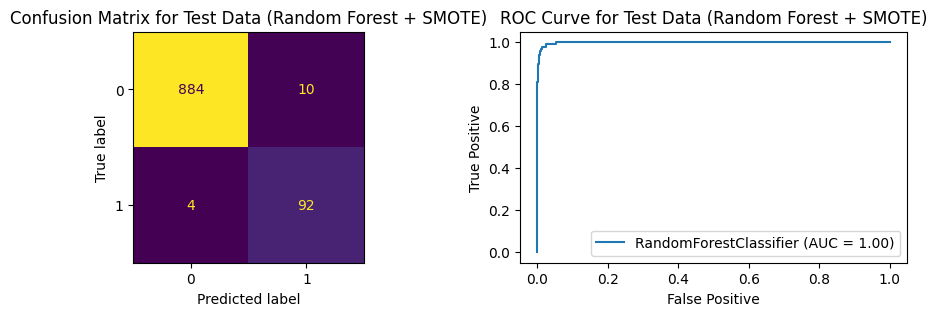

In [ ]:
y_pred_train_smote = rf_opt_smote.predict(X_dev_subsample_smote)
print("Classification performance (Random Forest) for SMOTE-based training dataset")
print("-"*60)
print(classification_report(y_dev_subsample_smote, y_pred_train_smote))

y_pred_test_smote = rf_opt_smote.predict(X_test)
print('')
print("Classification performance (Random Forest) for test dataset")
print("-"*60)
print(classification_report(y_test, y_pred_test_smote))

# Confusion Matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 3))
ConfusionMatrixDisplay.from_estimator(rf_opt_smote, X_test, y_test, colorbar=False, ax=ax1)
ax1.set_title('Confusion Matrix for Test Data (Random Forest + SMOTE)')                                     

# ROC Curve 
RocCurveDisplay.from_estimator(rf_opt_smote, X_test, y_test, ax=ax2)
ax2.set_title('ROC Curve for Test Data (Random Forest + SMOTE)')
ax2.set_xlabel('False Positive')
ax2.set_ylabel('True Positive')
plt.show() 

### Without SMOTE Technique
Dataset without using SMOTE technique (Random Forest)

In [ ]:
hyper_params = {'max_depth': np.arange(4, 10), 'n_estimators': [20, 50, 100], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2, 3]}
rf_ori = RandomForestClassifier(criterion='gini', random_state=0)
rf_opt_ori = tune_hyperparameters(rf_ori, hyper_params, X_dev, y_dev)  

Best hyperparameters based on the 5-fold corss-validation:
 {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}


Classification performance (Random Forest) for training dataset without SMOTE technique
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3573
           1       1.00      0.96      0.98       384

    accuracy                           1.00      3957
   macro avg       1.00      0.98      0.99      3957
weighted avg       1.00      1.00      1.00      3957


Classification performance (Random Forest) for test dataset
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       894
           1       0.99      0.91      0.95        96

    accuracy                           0.99       990
   macro avg       0.99      0.95      0.97       990
weighted avg       0.99      0.99      0.99       990



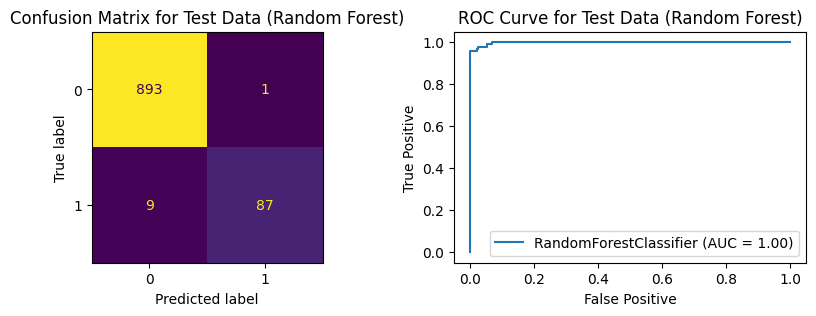

In [ ]:
y_pred_train_ori = rf_opt_ori.predict(X_dev)
print("Classification performance (Random Forest) for training dataset without SMOTE technique")
print("-"*60)
print(classification_report(y_dev, y_pred_train_ori))

y_pred_test_ori = rf_opt_ori.predict(X_test)
print('')
print("Classification performance (Random Forest) for test dataset")
print("-"*60)
print(classification_report(y_test, y_pred_test_ori))

# Confusion Matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
ConfusionMatrixDisplay.from_estimator(rf_opt_ori, X_test, y_test, colorbar=False, ax=ax1)
ax1.set_title('Confusion Matrix for Test Data (Random Forest)')                                     

# ROC Curve 
RocCurveDisplay.from_estimator(rf_opt_ori, X_test, y_test, ax=ax2)
ax2.set_title('ROC Curve for Test Data (Random Forest)')
ax2.set_xlabel('False Positive')
ax2.set_ylabel('True Positive')
plt.show() 

## XGBoost Model

XGBoost ML classifier:

To train XGBoost classifier, we will follow the below steps:

1. Train and test the XGBoost classifier using the SMOTE-based dataset
2. Visulize the confusion metric and ROC plot of the trained *XGBoost* classifer in test dataset
3. Train and test the XGBoost classifier using the dataset without SMOTE technique
4. Visulize the confusion metric and ROC plot of the trained classifer in test dataset

### With SMOTE Technique
SMOTE-based Dataset

In [ ]:
hyper_params = {'learning_rate': [0.05, 0.1, 0.2], 'n_estimators': [30, 50],'subsample': [0.6, 0.8, 1.0],'reg_alpha': [0, 0.1, 1],'reg_lambda': [0, 0.1, 1]}
xgb_smote = XGBClassifier(random_state=0)
xgb_opt_smote = tune_hyperparameters(xgb_smote, hyper_params, X_dev_subsample_smote, y_dev_subsample_smote)  

Best hyperparameters based on the 5-fold corss-validation:
 {'learning_rate': 0.2, 'n_estimators': 50, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 1.0}


Classification performance (XGBoost) for SMOTE-based training dataset
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3573
           1       1.00      1.00      1.00      3573

    accuracy                           1.00      7146
   macro avg       1.00      1.00      1.00      7146
weighted avg       1.00      1.00      1.00      7146


Classification performance (XGBoost) for test dataset
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       894
           1       0.93      0.98      0.95        96

    accuracy                           0.99       990
   macro avg       0.96      0.99      0.97       990
weighted avg       0.99      0.99      0.99       990



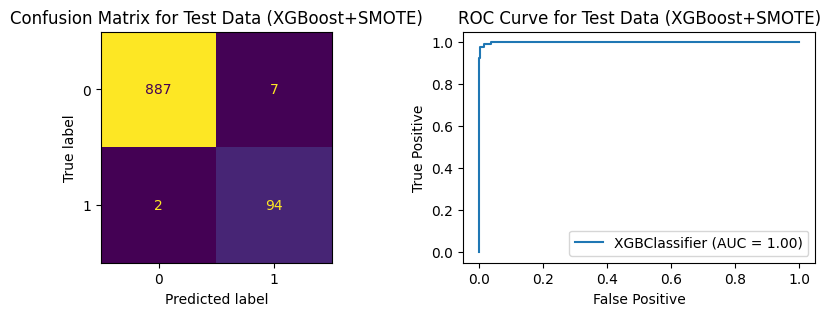

In [ ]:
y_pred_train_smote = xgb_opt_smote.predict(X_dev_subsample_smote)
print("Classification performance (XGBoost) for SMOTE-based training dataset")
print("-"*60)
print(classification_report(y_dev_subsample_smote, y_pred_train_smote))

y_pred_test_smote = xgb_opt_smote.predict(X_test)
print('')
print("Classification performance (XGBoost) for test dataset")
print("-"*60)
print(classification_report(y_test, y_pred_test_smote))

# Confusion Matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
ConfusionMatrixDisplay.from_estimator(xgb_opt_smote, X_test, y_test, colorbar=False, ax=ax1)
ax1.set_title('Confusion Matrix for Test Data (XGBoost+SMOTE)')                                     

# ROC Curve 
RocCurveDisplay.from_estimator(xgb_opt_smote, X_test, y_test, ax=ax2)
ax2.set_title('ROC Curve for Test Data (XGBoost+SMOTE)')
ax2.set_xlabel('False Positive')
ax2.set_ylabel('True Positive')
plt.show() 

### Without SMOTE Technique
Dataset without using SMOTE technique

In [ ]:
hyper_params = {'learning_rate': [0.05, 0.1, 0.2], 'n_estimators': [30, 50],'subsample': [0.6, 0.8, 1.0],'reg_alpha': [0, 0.1, 1],'reg_lambda': [0, 0.1, 1]}
xgb_ori = XGBClassifier(random_state=0)
xgb_opt_ori = tune_hyperparameters(xgb_ori, hyper_params, X_dev, y_dev)  

Best hyperparameters based on the 5-fold corss-validation:
 {'learning_rate': 0.2, 'n_estimators': 30, 'reg_alpha': 0, 'reg_lambda': 0, 'subsample': 0.6}


Classification performance (XGBoost) for training dataset without SMOTE technique
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3573
           1       0.99      0.98      0.99       384

    accuracy                           1.00      3957
   macro avg       1.00      0.99      0.99      3957
weighted avg       1.00      1.00      1.00      3957


Classification performance (XGBoost) for test dataset
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       894
           1       0.94      0.94      0.94        96

    accuracy                           0.99       990
   macro avg       0.97      0.97      0.97       990
weighted avg       0.99      0.99      0.99       990



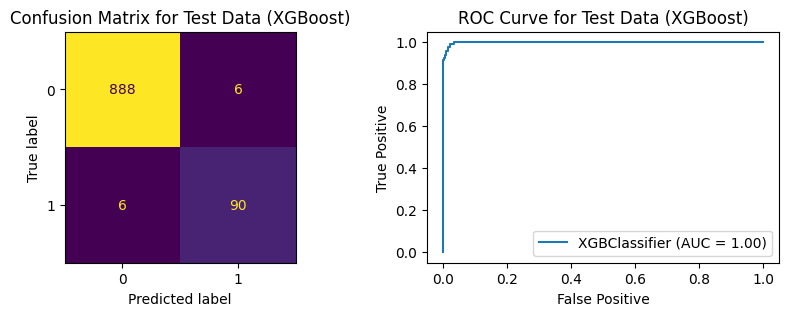

In [ ]:
y_pred_train_ori = xgb_opt_ori.predict(X_dev)
print("Classification performance (XGBoost) for training dataset without SMOTE technique")
print("-"*60)
print(classification_report(y_dev, y_pred_train_ori))

y_pred_test_ori = xgb_opt_ori.predict(X_test)
print('')
print("Classification performance (XGBoost) for test dataset")
print("-"*60)
print(classification_report(y_test, y_pred_test_ori))

# Confusion Matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
ConfusionMatrixDisplay.from_estimator(xgb_opt_ori, X_test, y_test, colorbar=False, ax=ax1)
ax1.set_title('Confusion Matrix for Test Data (XGBoost)')                                     

# ROC Curve 
RocCurveDisplay.from_estimator(xgb_opt_ori, X_test, y_test, ax=ax2)
ax2.set_title('ROC Curve for Test Data (XGBoost)')
ax2.set_xlabel('False Positive')
ax2.set_ylabel('True Positive')
plt.show() 

## Support Vector Machine(SVM)

SVM ML classifier:

To train SVM classifier, we will follow the below steps:

1. Train and test the SVM classifier using the SMOTE-based dataset
2. Visulize the confusion metric and ROC plot of the trained SVM classifer in test dataset
3. Train and test the SVM classifier using the dataset without SMOTE technique
4. Visulize the confusion metric and ROC plot of the trained classifer in test dataset

### With SMOTE Technique
SMOTE-based Dataset

In [ ]:
hyper_params = [{'kernel': ['rbf'],'gamma': [1, 0.1, 0.01, 0.001], 'C': [100, 10, 0.1,1, 1000]}, {'kernel': ['linear'], 'C': [10, 0.1, 1, 100, 1000]}]
svm_smote = SVC(probability=True, max_iter=600)
svm_opt_smote = tune_hyperparameters(svm_smote, hyper_params, X_dev_subsample_smote, y_dev_subsample_smote)  

Best hyperparameters based on the 5-fold corss-validation:
 {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


Classification performance (SVM) for SMOTE-based training dataset
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3573
           1       0.98      0.95      0.96      3573

    accuracy                           0.96      7146
   macro avg       0.96      0.96      0.96      7146
weighted avg       0.96      0.96      0.96      7146


Classification performance (SVM) for test dataset
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       894
           1       0.28      0.31      0.29        96

    accuracy                           0.85       990
   macro avg       0.60      0.61      0.61       990
weighted avg       0.86      0.85      0.86       990



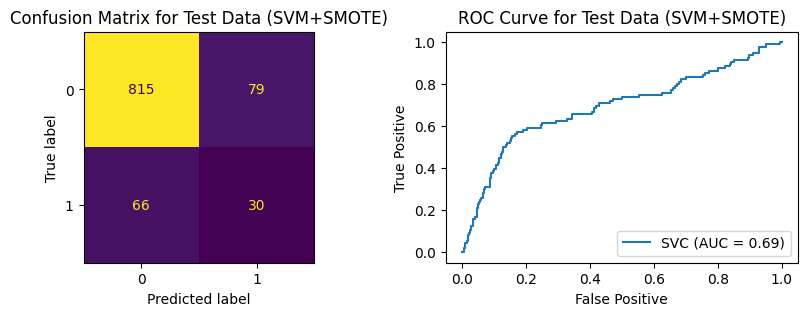

In [ ]:
y_pred_train_smote = svm_opt_smote.predict(X_dev_subsample_smote)
print("Classification performance (SVM) for SMOTE-based training dataset")
print("-"*60)
print(classification_report(y_dev_subsample_smote, y_pred_train_smote))

y_pred_test_smote = svm_opt_smote.predict(X_test)
print('')
print("Classification performance (SVM) for test dataset")
print("-"*60)
print(classification_report(y_test, y_pred_test_smote))

# Confusion Matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
ConfusionMatrixDisplay.from_estimator(svm_opt_smote, X_test, y_test, colorbar=False, ax=ax1)
ax1.set_title('Confusion Matrix for Test Data (SVM+SMOTE)')                                     

# ROC Curve 
RocCurveDisplay.from_estimator(svm_opt_smote, X_test, y_test, ax=ax2)
ax2.set_title('ROC Curve for Test Data (SVM+SMOTE)')
ax2.set_xlabel('False Positive')
ax2.set_ylabel('True Positive')
plt.show() 

### Without SMOTE Technique

In [ ]:
hyper_params = [{'kernel': ['rbf'],'gamma': [1, 0.1, 0.01, 0.001], 'C': [0.1, 1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [0.1, 1, 10, 100, 1000]}]
svm_ori = SVC(probability=True, max_iter=600)
svm_opt_ori = tune_hyperparameters(svm_smote, hyper_params, X_dev, y_dev)  

Best hyperparameters based on the 5-fold corss-validation:
 {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}


Classification performance (SVM) for training dataset without SMOTE technique
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3573
           1       0.59      0.70      0.64       384

    accuracy                           0.92      3957
   macro avg       0.78      0.83      0.80      3957
weighted avg       0.93      0.92      0.93      3957


Classification performance (SVM) for test dataset
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       894
           1       0.41      0.47      0.44        96

    accuracy                           0.88       990
   macro avg       0.68      0.70      0.69       990
weighted avg       0.89      0.88      0.89       990



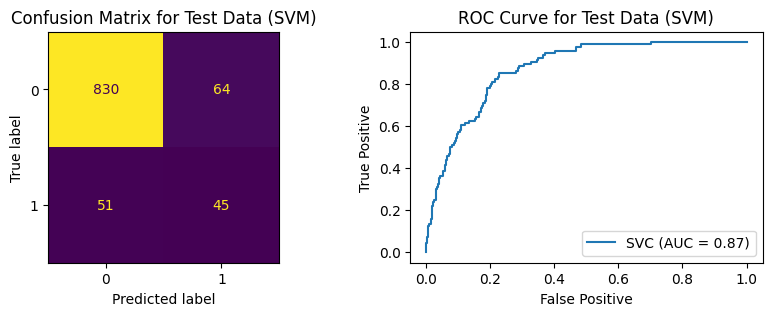

In [ ]:
y_pred_train_ori = svm_opt_ori.predict(X_dev)
print("Classification performance (SVM) for training dataset without SMOTE technique")
print("-"*60)
print(classification_report(y_dev, y_pred_train_ori))

y_pred_test_ori = svm_opt_ori.predict(X_test)
print('')
print("Classification performance (SVM) for test dataset")
print("-"*60)
print(classification_report(y_test, y_pred_test_ori))

# Confusion Matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
ConfusionMatrixDisplay.from_estimator(svm_opt_ori, X_test, y_test, colorbar=False, ax=ax1)
ax1.set_title('Confusion Matrix for Test Data (SVM)')                                     

# ROC Curve 
RocCurveDisplay.from_estimator(svm_opt_ori, X_test, y_test, ax=ax2)
ax2.set_title('ROC Curve for Test Data (SVM)')
ax2.set_xlabel('False Positive')
ax2.set_ylabel('True Positive')
plt.show() 